In [1]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr; from scipy.interpolate import griddata
from matplotlib.path import Path

In [112]:
x = open("bndmbn.txt", "r", encoding="utf-8")
x.read()
x = '  40.50   74.00\n  39.50   72.00\n  40.00   71.40\n  40.00   69.50\n  41.00   69.50\n  41.10   70.00\n  41.00   72.00\n  40.50   74.00\n'
output1x = x.split('\n')

newx = [] 
for string in output1x:
    output2x = string.split(' ')
    newx.append(output2x)
newx = [['', '', '40.50', '', '', '74.00'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.00', '', '', '71.40'], ['', '', '40.00', '', '', '69.50'], ['', '', '41.00', '', '', '69.50'], ['', '', '41.10', '', '', '70.00'], ['', '', '41.00', '', '', '72.00'], ['', '', '40.50', '', '', '74.00']]
lon_x = []; lat_x = []

for i in range(8): 
    x1 = newx[i][2]
    lat_x.append(x1)
    x3 = newx[i][5]
    lon_x.append(x3)
lonlist_x = [float(i) for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x = pd.DataFrame({'lon': lonlist_x, 'lat': latlist_x,})

lonlist_x_plot = [float(i)*-1 for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x_plot = pd.DataFrame({'lon': lonlist_x_plot, 'lat': latlist_x,})
x_x = df_x_plot['lon']; y_x = df_x_plot['lat']

lonlist_xneg = [float(i)*-1 for i in lon_x]
df_x_plottable = pd.DataFrame({'lon': lonlist_xneg, 'lat': latlist_x,})

In [113]:
polygon_x = Polygon(df_x.values.tolist())
print(polygon_x)

POLYGON ((74 40.5, 72 39.5, 71.40000000000001 40, 69.5 40, 69.5 41, 70 41.1, 72 41, 74 40.5))


In [101]:
y = open("bndgme.txt", "r", encoding="utf-8")
y.read()
y = '  41.80   68.00\n  42.10   67.50\n  42.10   67.00\n  42.10   66.00\n  43.00   66.00\n  44.20   66.50\n  44.20   67.00\n  44.20   68.00\n  41.80   68.00\n'
output1y = y.split('\n')

newy = [] 
for string in output1y:
    output2y = string.split(' ')
    newy.append(output2y)
newy = [['', '', '41.80', '', '', '68.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '66.00'], ['', '', '43.00', '', '', '66.00'], ['', '', '44.20', '', '', '66.50'], ['', '', '44.20', '', '', '67.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '41.80', '', '', '68.00']]
lon_y = []; lat_y = []

for i in range(9): 
    y1 = newy[i][2]
    lat_y.append(y1)
    y3 = newy[i][5]
    lon_y.append(y3)
lonlist_y = [float(i) for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y = pd.DataFrame({'lon': lonlist_y, 'lat': latlist_y,})

lonlist_y_plot = [float(i)*-1 for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y_plot = pd.DataFrame({'lon': lonlist_y_plot, 'lat': latlist_y,})
x_y = df_y_plot['lon']; y_y = df_y_plot['lat']

lonlist_yneg = [float(i)*-1 for i in lon_y]
df_y_plottable = pd.DataFrame({'lon': lonlist_yneg, 'lat': latlist_y,})

In [102]:
polygon_y = Polygon(df_y.values)
print(polygon_y)

POLYGON ((68 41.8, 67.5 42.1, 67 42.1, 66 42.1, 66 43, 66.5 44.2, 67 44.2, 68 44.2, 68 41.8))


In [114]:
years = []; filteredMLDlist = []; filteredMLDstdlist = []; filteredfloorslist = []
for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = [];counterii = []; floors = []; floor_intermediate = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
#         if gear == 'Bottle':
#             pass
#         if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
        if yd >=0 and yd <= 365:
            if gear == 'Bottle':
                pass
            else:
#         elif yd > 243 and yd <= 334:
                lat_intermediate.append(npfile[i]['lat'])
                lon_intermediate.append(npfile[i]['lon'])
                p_intermediate.append(npfile[i]['p'])
                t_intermediate.append(npfile[i]['t'])
                yd_intermediate.append(npfile[i]['yd'])
                floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate, 
                            'depth': floor_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_x.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'temp': month_df['t'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
#             print(month_df['depth'].iloc[ii])
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for x in range(len(l)):
                    val = df_final[1][x]
                    numrange.append(x)
                    surfaceval.append(val)      
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            pnew = []; allmixedcount = []
            inconclusivecount = []
            pnew = []
            for ix in range(len(dffin)):
                b = dffin.at[ix,'temp']
                
                if b > (surfacevalmean + 0.2) or b < (surfacevalmean - 0.2):
                    pass
                
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    if dffin.at[ix,'pressure'] >= floordepth - 6:
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
                        counterii.append(ix)
#                         print(month_df['depth'].iloc[ii]) 
                        floors.append(month_df['depth'].iloc[ii])
#                         print(ii)
#                         print(month_df.at[ii,'depth'])
                        pnew.append(dffin.at[ix,'pressure'])
#                         if len(pnew) > 0:
#                             yplottable = pnew[0]*-1

#                         plt.style.use('seaborn-white')  
#                         plt.plot(df_final[1],df_final[0]*-1,color='blue')
#                         plt.axhline(y=yplottable, color='r', linestyle='--')
#                         plt.xlabel('Temperature (°C)')
#                         plt.ylabel('Pressure (m)')
#                         plt.grid(False)
#                         plt.show()
                    elif dffin.at[ix,'pressure'] == df_final[0].iloc[-1]:
                        pass
                    elif dffin.at[ix,'pressure'] == 0:
                        pass
                    else:
                        seasonyeartemp.append(dffin.at[ix,'temp'])
                        seasonyeardepth.append(dffin.at[ix,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
                        counterii.append(ii)
                        floors.append(month_df['depth'].iloc[ii])
                        pnew.append(dffin.at[ix,'pressure'])
#                         if len(pnew) > 0:
#                             yplottable = pnew[0]*-1

#                         plt.style.use('seaborn-white')  
#                         plt.plot(df_final[1],df_final[0]*-1,color='blue')
#                         plt.axhline(y=yplottable, color='r', linestyle='--')
#                         plt.xlabel('Temperature (°C)')
#                         plt.ylabel('Pressure (m)')
#                         plt.grid(False)
#                         plt.show()
#                         print(month_df['depth'].iloc[ii])  

#                         print(ii)
#                         print(month_df.at[ii,'depth'])
                    break  
#     print(year, seasonyeartemp)
    monthly = []
    if len(seasonyeartemp) > 0:
#         print('depth_',year,np.mean(seasonyeardepth))
#         print(seasonyeardepth)
#         print(floors)
        bottomandmixeddepths = pd.DataFrame({'MLD': seasonyeardepth,'bottomd': floors}) 
#         print(bottomandmixeddepths)
        bottomandmixeddepths = bottomandmixeddepths[bottomandmixeddepths.bottomd <= 200]
#         print(bottomandmixeddepths)
        filteredMLD = bottomandmixeddepths['MLD'].tolist()
        filteredfloors = bottomandmixeddepths['bottomd'].tolist()
#         print('filtereddepthstd_',year,np.std(filteredMLD))
#         print(filteredMLD)
#         print(filteredfloors)
        new = np.mean(filteredMLD)
        newstd = np.std(filteredMLD)
        print('filtereddepth_',year,np.mean(filteredMLD))
        filteredMLDlist.append(new)
        filteredMLDstdlist.append(filteredMLD)
        filteredfloorslist.append(filteredfloors)
    years.append(year)
#     filteredMLDlist.append(np.mean(filteredMLD))

filtereddepth_ 1982 29.5
filtereddepth_ 1987 20.718446601941746
filtereddepth_ 1988 24.964285714285715
filtereddepth_ 1989 23.732142857142858
filtereddepth_ 1990 33.94871794871795
filtereddepth_ 1991 31.305194805194805
filtereddepth_ 1992 35.505376344086024
filtereddepth_ 1993 32.735849056603776
filtereddepth_ 1994 20.357142857142858
filtereddepth_ 1995 27.253333333333334
filtereddepth_ 1996 21.177777777777777
filtereddepth_ 1997 21.32
filtereddepth_ 1998 29.220338983050848
filtereddepth_ 1999 27.388489208633093
filtereddepth_ 2000 23.73780487804878
filtereddepth_ 2001 32.63333333333333
filtereddepth_ 2002 26.62992125984252
filtereddepth_ 2003 22.779816513761467
filtereddepth_ 2004 24.11842105263158
filtereddepth_ 2005 25.852713178294575
filtereddepth_ 2006 26.360544217687075
filtereddepth_ 2007 27.659574468085108
filtereddepth_ 2008 27.53125
filtereddepth_ 2009 30.16751269035533
filtereddepth_ 2010 31.706586826347305
filtereddepth_ 2011 27.953757225433527
filtereddepth_ 2012 24.261780

In [115]:
flat_filteredfloorslist = sum(filteredfloorslist, []) 
flat_filteredMLDstdlist = sum(filteredMLDstdlist, []) 
print(len(flat_filteredfloorslist))
print(len(flat_filteredMLDstdlist))

4546
4546


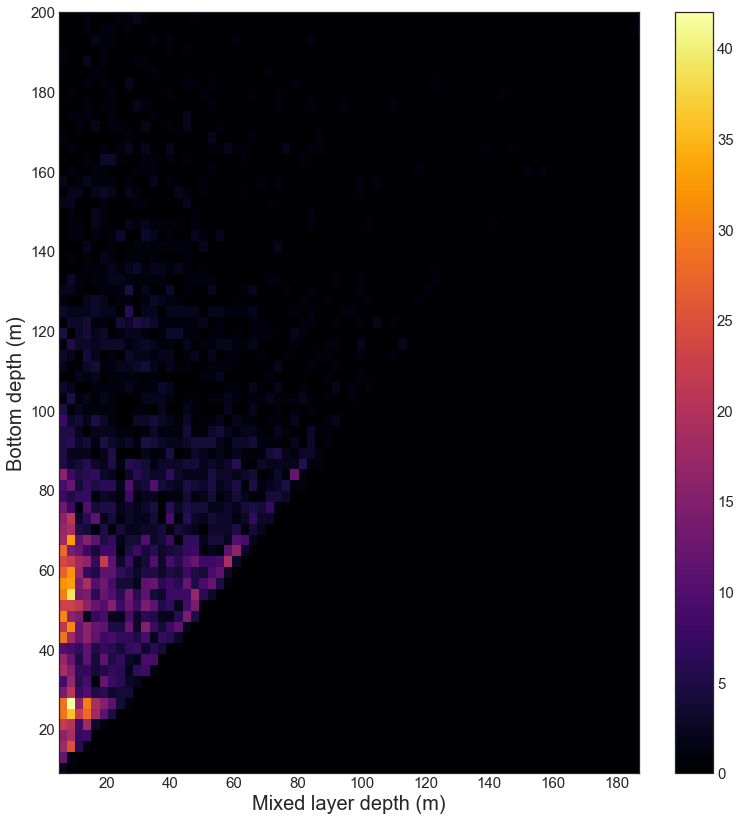

In [120]:
x = flat_filteredMLDstdlist
y = flat_filteredfloorslist
plt.style.use('seaborn-white')
plt.figure(figsize=(13, 14))
# plt.scatter(x, y, marker='.', c='red')
plt.hist2d(x, y, bins=(70, 70), cmap='inferno')
# plt.ylim((30,200))
# plt.xlim((4,180))
# plt.scatter(x, y, marker='.', c='red')
plt.ylabel('Bottom depth (m)', fontsize = 20)
plt.xlabel('Mixed layer depth (m)', fontsize = 20)
plt.xticks([20, 40,60,80,100,120,140,160,180], fontsize = 15) 
plt.yticks([20,40,60,80,100,120,140,160,180,200], fontsize = 15) 
cbar = plt.colorbar()
# cbar.ax.set_yticklabels(fontsize=15)
cbar.ax.set_yticklabels([0,5, 10,15, 20,25, 30,35, 40], fontsize=15)
# cbar.set_label('Count', rotation=270, fontsize = 20)

# plt.grid(b=True, which='major', color='white', linestyle='--',alpha = 0.15)
plt.savefig('2dhist')
plt.show()